## Welcome! 

In this brief notebook, __I will be visualizing the correlation between housing prices and a few other features of a house__. Even though this is just a quick exercise, the conclusions we draw here are important- knowing what makes a house expensive is valuable knowledge, since it helps you avoid scams when making what is arguably the most important purchase of your life! 

## Imports


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

## Dataset- First Glances

source: https://www.kaggle.com/camnugent/california-housing-prices

In [32]:
# get data
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


As you can see, the data displays __statistics for houses in a given area__. Here is a proper description of the data from the actual website: 

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

I wish to see the correlation between three features and median house value: __total rooms, population, and median household income__. My hope is that these three features will have distinct correlation values and therefore make for unique visualizations. 

In order to visualize the correlation and see it numerically, I can graph scatterplots where x represents one of my 3 features and y represents the median housing value (scatterplots with less spread indicate a stronger correlation). Afterwards, I can use Scipy's Pearson Correlation module to find the correlation as a number. 

### Correlation 1: Total Rooms Within Block vs Median House Value

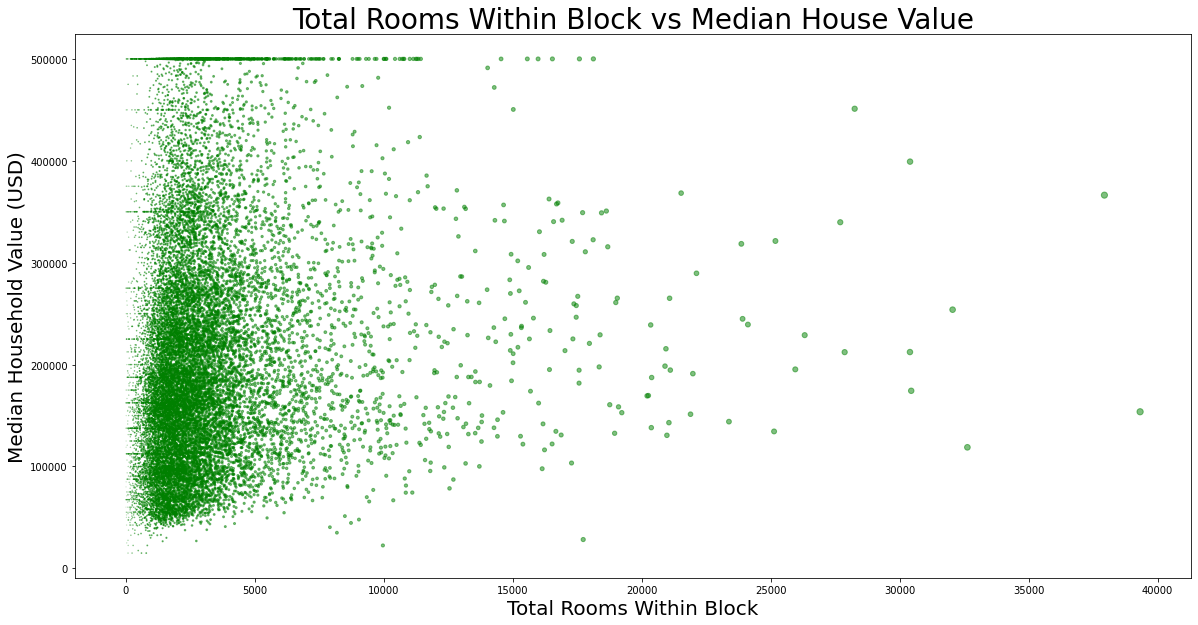

In [33]:
# plot 
plt.figure(figsize=(20,10))


plt.xlabel(xlabel="Total Rooms Within Block", fontsize = 20)
plt.ylabel(ylabel="Median Household Value (USD)", fontsize = 20)
plt.title(label="Total Rooms Within Block vs Median House Value", fontsize = 28)

plt.scatter(
    x = data["total_rooms"],
    y = data["median_house_value"],
    alpha = 0.5,
    s = data["total_rooms"].apply(lambda x: x / 1000),
    color = "green"
)

plt.show()

In [34]:
# Pearson correlation coefficient
pearsonr(data["total_rooms"], data["median_house_value"])

(0.1341531138065631, 1.6893845634754333e-83)

### Correlation 2: Population Within Block vs Median House Value

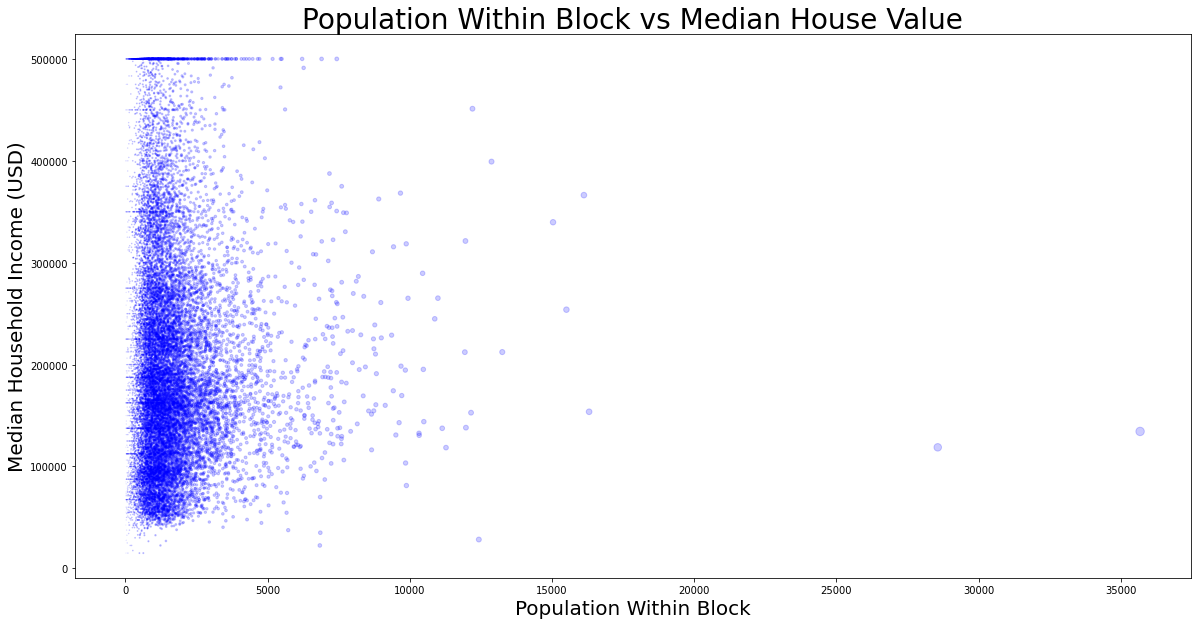

In [27]:
# plot 
plt.figure(figsize=(20,10))

plt.xlabel(xlabel="Population Within Block", fontsize = 20)
plt.ylabel(ylabel="Median Household Value (USD)", fontsize = 20)
plt.title(label="Population Within Block vs Median House Value", fontsize = 28)

plt.scatter(
    x = data["population"],
    y = data["median_house_value"],
    alpha = 0.2,
    s = data["population"].apply(lambda x: x / 500),
    color = "blue"
)

plt.show()

In [36]:
# correlation coefficient
pearsonr(data["population"], data["median_house_value"])

(-0.02464967888889488, 0.0003976307847911049)

### Correlation 3: Median Household Income Within Block vs Median House Value

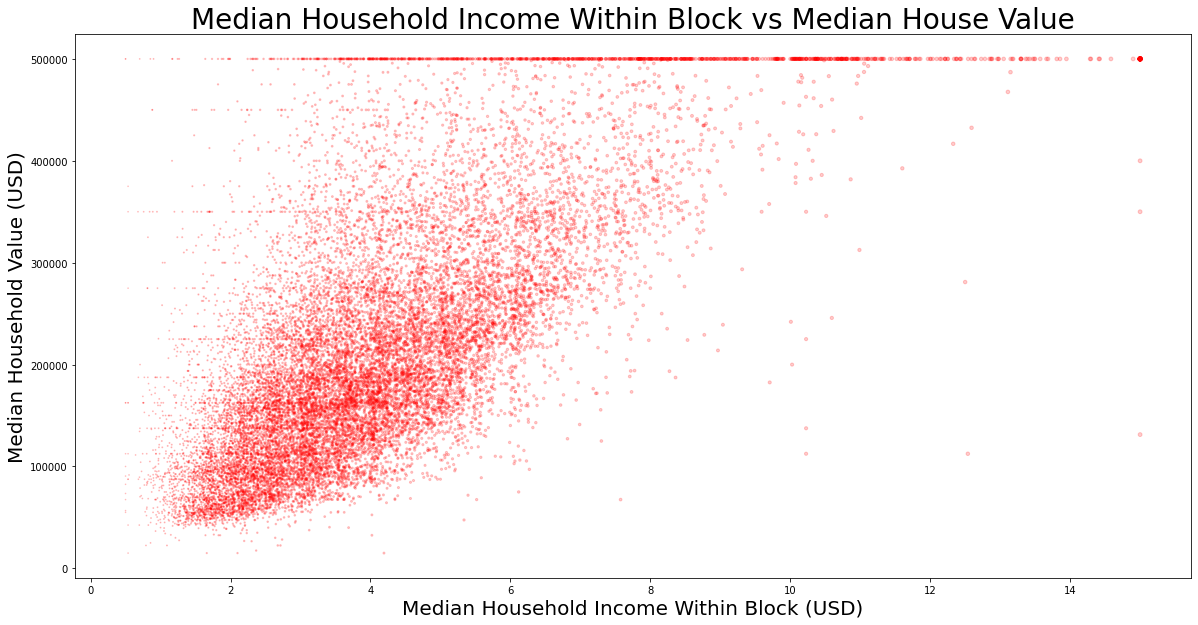

In [37]:
# plot 
plt.figure(figsize=(20,10))


plt.xlabel(xlabel="Median Household Income Within Block (USD)", fontsize = 20)
plt.ylabel(ylabel="Median Household Value (USD)", fontsize = 20)
plt.title(label="Median Household Income Within Block vs Median House Value", fontsize = 28)

plt.scatter(
    x = data["median_income"],
    y = data["median_house_value"],
    alpha = 0.2,
    s = data["median_income"],
    color = "red"
)

plt.show()

In [35]:
# correlation coefficient
pearsonr(data["median_income"], data["median_house_value"])

(0.6880752079585478, 0.0)

## Conclusions: What decides housing prices?  

From the visualizations and corresponding Pearson correlation values, we may deduce that __median household income has the strongest correlation with median house value__ out of the three features (total rooms, population, and median household income) selected. 

In the scatterplots of total rooms vs meddian house value and total population vs median house value, the points in the plot follow no discernable pattern and the correlation coefficients (strength is indicated by the first value in the outputs of the cells containing "pearsonr") are very close to 0. 

However, in the scatterplot of median household income vs median house value, the points are clustered somewhat close to an imaginary line and the correlation coefficient is fairly high, with a value of 0.688. Again, median household income is therefore  the value most strongly correlated to median house value for an area. 